In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Modelos Lineales

Los modelos lineales tienen grandes ventajas: son fáciles de implementar e interpretar.
Esto los convierte en una base conceptual importante que es necesario revisar antes de pasar a métodos 
más complejos.

En un modelo lineal la respuesta, o target, $Y$ se modela como una combinación lineal de variables $X_1, \ldots, X_p$:

$$
Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p
$$

En este notebook vamos a utilizar `scikit-learn` para ajustar diferentes modelos lineales a un conjunto de datos.

Primero importamos el submódulo necesario

In [4]:
import sklearn.linear_model

sklearn.linear_model tiene una gran variedad de objetos que implementan diferentes tipos de modelos lineales.
La lista completa se pueden encontrar en http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

En este notebook vamos a empezar con el modelo más sencillo de todos: la regresión lineal por mínimos cuadrados.

## Precios de Carros en Estados Unidos en 1993

Para hacer la discusión más concreta vamos a cargar datos sobre precios y características de carros en Estados Unidos 
en el año 1993. Los datos que se encuentran en este repositorio son una copia tomada de https://vincentarelbundock.github.io/Rdatasets/doc/MASS/Cars93.html

En esa página se encuentra la descripción de cada una de las variables.
Por ahora vamos a cargar el archivo usando pandas

In [5]:
data = pd.read_csv('Cars93.csv')

El número total de entradas es

In [6]:
len(data)

93

El número de columnas es

In [7]:
len(data.keys())

28

Los nombres de las columnas son

In [8]:
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

Una visión rápida de los primeros 10 elementos

In [9]:
data[:10]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


Como respuesta vamos a utilizar `Price` y como variables `Turn.circle`, `Horsepower` y  `MPG.Highway`
Vamos a recortar entonces las columnas a esas variables 

In [10]:
subset_data = data[['Price', 'Horsepower', 'MPG.highway', 'Turn.circle']]
subset_data

,Price,Horsepower,MPG.highway,Turn.circle
0,15.9,140,31,37
1,33.9,200,25,38
2,29.1,172,26,37
3,37.7,172,26,37
4,30.0,208,30,39
5,15.7,110,31,41
6,20.8,170,28,42
7,23.7,180,25,45
8,26.3,170,27,41
9,34.7,200,25,43


Para empezar vamos a graficar las propiedades de `subset_data`

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


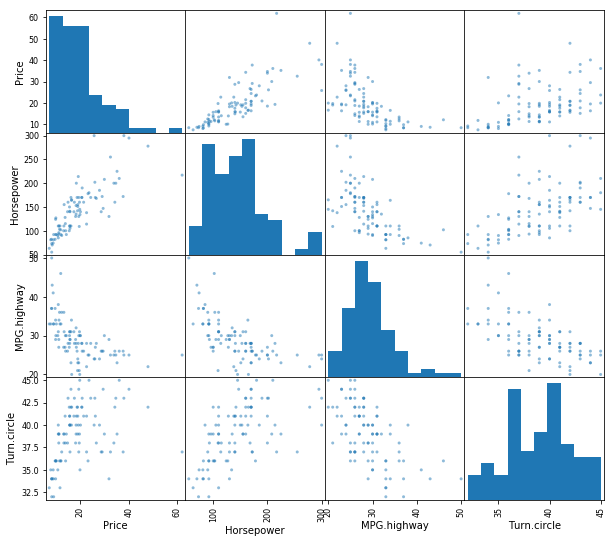

In [11]:
from pandas.tools import plotting

_ = plotting.scatter_matrix(subset_data, figsize=(10,9))

La primera fila de la figura anterior nos muestra que en efecto hay correlaciones entre `Price` y las variables de interés.
Lo que vamos a hacer para empezar es encontrar los mejores parámetros para el modelo `Price` = $\beta_0$ + $\beta_1 \times $`Horsepower`.

Para esto vamos a inicializar la clase `sklearn.linear_model.LinearRegression`

In [12]:
linear = sklearn.linear_model.LinearRegression()

En este momento `linear` es una objeto que representa la clase `sklearn.linear_model.LinearRegression`.
Por eso es posible acceder a varios métodos a través de `linear`. 

La lista completa de métodos disponibles es:

In [13]:
dir(linear)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

Para empezar nos vamos a interesar en los métodos `fit`, `predict`  y  `score`.

## **`fit`**

`fit` es el método que hace el ajuste. Espera al menos dos parámetros de entrada: `X` y `Y`.
`Y` es el target y `X` son las variables del modelo. 
Es importante notar que `X` debe tener la forma `[n_samples, n_features]`.
Tal como se encuentra ahora `data[`Horsepower`]` tiene una forma de `[n_samples]`.
Para convertirlo al formato adecuado podemos escribir

In [14]:
X = data['Horsepower'].values.reshape(-1,1)
Y = data['Price'].values.reshape(-1,1)

Con esta definición el ajuste se hace simplemente como

In [15]:
linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ahora los atributos de linear contienen los valores de los coeficientes $\beta_i$.

Para $\beta_0$ usamos el atributo `intercept_`

In [16]:
print(linear.intercept_)

[-1.39876912]


Para $\beta_1$ usamos el atributo `coef_`

In [17]:
print(linear.coef_)
print(linear.intercept_)

[[0.14537123]]
[-1.39876912]


Esto quiere decir que podemos escribir el modelo como 

`Price` = `-1.39` + `0.14` $\times$ `Horsepower`  

## **`predict`**

El método `predict` hace una predicción de `Y` dados valores de entrada de `X`.
Si llamamamos el metodos con las variable `X` de entrada, entonces vamos a obtener la recta de mejor ajuste

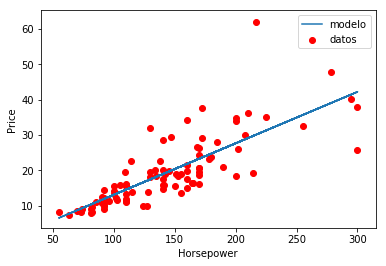

In [18]:
Y_predict = linear.predict(X)
plt.plot(X, Y_predict, label='modelo')
plt.scatter(X, Y, label='datos', color='red')
plt.legend()
plt.xlabel('Horsepower')
_ = plt.ylabel('Price')

## **`score`**

Para tener una medida de que tan bueno es el ajuste usamos el coeficiente $R^2$
definido como 

$$
R^2 = 1 - \frac{\sum (y_{\rm obs} - y_{\rm model})^2}{\sum (y_{\rm obs} - \bar{y}_{\rm obs})^2}
$$

donde $\bar{y}_{\rm model}$ es el promedio de los valores observados.

En nuestro caso tenemos

In [19]:
print(linear.score(X, Y))
data.keys()

0.6212869500338225


Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

### Ejercicio 6.1

Haga los ajustes, gráficas de modelo vs. datos y cálculo de score para los siguientes modelos:

* `Price` = $\beta_0$ + $\beta_1 \times $`MPG.Highway`.

* `Price` = $\beta_0$ + $\beta_1 \times $`Turn.circle`.

De acuerdo al $R^2$ score, cual de los tres modelos es el mejor?

In [20]:
linear_1 = sklearn.linear_model.LinearRegression()
MPG = data['MPG.highway'].values.reshape(-1,1)
Turn = data['Turn.circle'].values.reshape(-1,1)
Y = data['Price'].values.reshape(-1,1)

In [21]:
model_1=linear_1.fit(MPG,Y)
print(model_1.coef_)
print(model_1.intercept_)





[[-1.01577846]]
[49.05463153]


R^2=  0.314362468002246


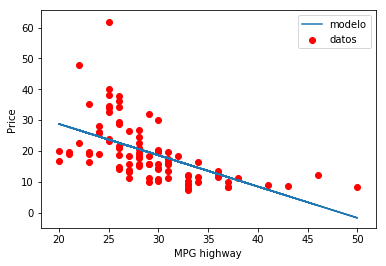

In [22]:

Y_predict = model_1.predict(MPG)
plt.plot(MPG, Y_predict, label='modelo')
plt.scatter(MPG, Y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG highway')
_ = plt.ylabel('Price')
print("R^2= ",model_1.score(MPG, Y))

[[1.17650745]]
[-26.32351055]
R^2=  0.15412685056314568


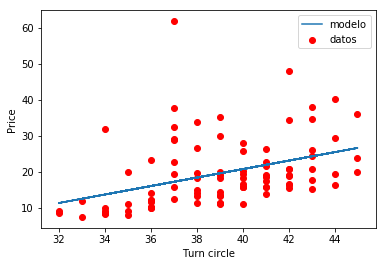

In [23]:
linear_2 = sklearn.linear_model.LinearRegression()
model_2=linear_2.fit(Turn,Y)
print(model_2.coef_)
print(model_2.intercept_)
Y_predict = model_2.predict(Turn)
plt.plot(Turn, Y_predict, label='modelo')
plt.scatter(Turn, Y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn circle')
_ = plt.ylabel('Price')
print("R^2= ",model_2.score(Turn, Y))

El mejor es el de Horsepower vs Price, pues se tiene un valor de $R^2$=0.621

### Ejercicio 6.2

Haga los ajustes, gráficas de modelo vs. datos y cálculo de score para los tres modelos lineales que incluyan dos variables.

De acuerdo al $R^2$ score, es alguno de estos modelos mejor que los tres anteriores?

R^2=  0.3198708229328999
[[-0.91657745  0.27639688]]
[35.4016788]


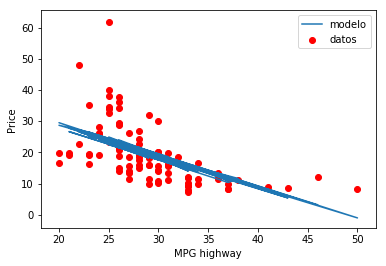

In [24]:
MPG_turn= data[['MPG.highway',"Turn.circle"]]
Y = data['Price'].values.reshape(-1,1)
linear_3 = sklearn.linear_model.LinearRegression()
Model=linear_3.fit(MPG_turn,Y)
Model.fit(MPG_turn,Y)
#print(linear_3.score(MPG_turn,Y))
Y_predict = Model.predict(MPG_turn)

plt.plot(MPG_turn['MPG.highway'], Y_predict, label='modelo')
plt.scatter(MPG_turn['MPG.highway'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG highway')
_ = plt.ylabel('Price')
print("R^2= ",Model.score(MPG_turn, Y))
print(Model.coef_)
print(Model.intercept_)

R^2=  0.6249029173886569
[[ 0.15289122 -0.21772625]]
[6.00160489]


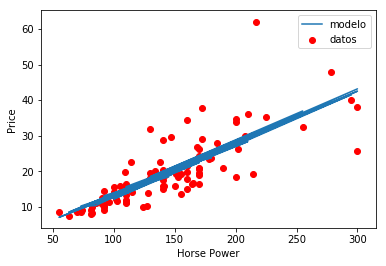

In [25]:
X= data[['Horsepower',"Turn.circle"]]
Y = data['Price'].values.reshape(-1,1)
linear_4 = sklearn.linear_model.LinearRegression()
Model=linear_4.fit(X,Y)
Model.fit(X,Y)
#print(linear_3.score(MPG_turn,Y))
Y_predict = Model.predict(X)

plt.plot(X['Horsepower'], Y_predict, label='modelo')
plt.scatter(X['Horsepower'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('Horse Power')
_ = plt.ylabel('Price')
print("R^2= ",Model.score(X, Y))
print(Model.coef_)
print(Model.intercept_)

R^2=  0.629865302134315
[[ 0.13190677 -0.21365778]]
[6.75225042]


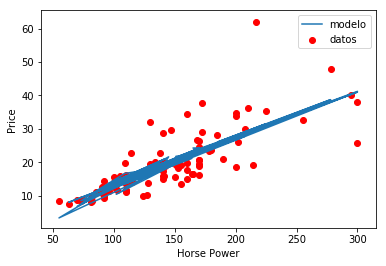

In [26]:
X= data[['Horsepower',"MPG.highway"]]
Y = data['Price'].values.reshape(-1,1)
linear_5 = sklearn.linear_model.LinearRegression()
Model=linear_5.fit(X,Y)
Model.fit(X,Y)
#print(linear_3.score(MPG_turn,Y))
Y_predict = Model.predict(X)

plt.plot(X['Horsepower'], Y_predict, label='modelo')
plt.scatter(X['Horsepower'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('Horse Power')
_ = plt.ylabel('Price')
print("R^2= ",Model.score(X, Y))
print(Model.coef_)
print(Model.intercept_)

Dos modelos fueron mejores que para los casos anteriores, el caso de Horsepower con MPG.highway fue el mejor con $R^2$=0.62.

### Ejercicio 6.3

Haga los ajustes, gráficas de modelo vs. datos y cálculo de score para el siguiente modelo:

* `Price` = $\beta_0$ + $\beta_1 \times $ `Horsepower`+ $\beta_2 \times $ `MPG.Highway` + $\beta_3 \times $ `Turn.circle`.

De acuerdo al $R^2$ score, es este modelos mejor que los seis modelos anteriores?

R^2=  0.6404523210544848
[[ 0.1396872  -0.31082732 -0.40256029]]
[24.14202012]


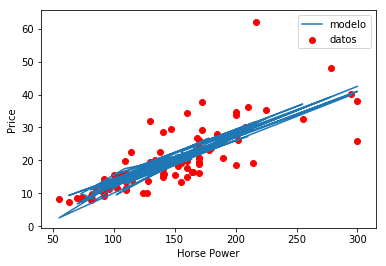

In [27]:
X= data[['Horsepower',"MPG.highway","Turn.circle"]]
Y = data['Price'].values.reshape(-1,1)
linear_6 = sklearn.linear_model.LinearRegression()
Model=linear_6.fit(X,Y)
Model.fit(X,Y)
#print(linear_3.score(MPG_turn,Y))
Y_predict = Model.predict(X)

plt.plot(X['Horsepower'], Y_predict, label='modelo')
plt.scatter(X['Horsepower'], Y, label='datos', color='red')
plt.legend()
plt.xlabel('Horse Power')
_ = plt.ylabel('Price')
print("R^2= ",Model.score(X, Y))
print(Model.coef_)
print(Model.intercept_)

Para este caso lo que se tiene es que el $R^2$ es incluso mayor, con lo cual se tiene que para un modelo de tipo lineal usando las tres variables, el ajuste de los datos en mejor.

### Ejercicio 6.4

Calcule la evidencia bayesiana para los siete modelos lineales probados antes. ¿Cuál es el mejor modelo?

In [62]:
def model(x_datos,param):
    y=x_datos.copy()
    y[:]=0
    for i in range(len(param)):
        y += param[i]*x_datos
    return y

def loglikelihood(x_obs, y_obs, sigma_y_obs, param):
    d = y_obs -  model(x_obs,param)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def Avg(x_obs,y_obs,sigma_y_obs,orden,N):
    test=0.0
    for i in range(N):
        param=np.random.uniform(-40,40,size=1)
        param=np.append(param,np.random.uniform(-1,1,size=orden-1))
        test +=np.exp(loglikelihood(x_obs, y_obs,sigma_y_obs, param) - (len(x_obs)/2.0)*(np.log(2.0*np.pi))-((1)/2.0)*sum(np.log(sigma_y_obs)))
    return test/N

In [64]:
X=np.array(data['Horsepower'])
Y = np.array(data['Price'])
sigma = np.std(Y)*np.ones(len(Y))
print(Avg(X,Y,sigma,2,10000))

X=np.array(data['MPG.highway'])
print(Avg(X,Y,sigma,2,10000))


X=np.array(data['Turn.cicle'])
print(Avg(X,Y,sigma,2,10000))


TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int64') with casting rule 'same_kind'